In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 

In [34]:
#Read DataFrame
df=pd.read_csv("2020_03_11.csv")
print("Shape of df: ",df.shape)

#Print Head 
df.head()

Shape of df:  (12, 6)


,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Date,Latitude,Longitude
0,Delhi,5,0,2020-03-11,28.7041,77.1025
1,Haryana,0,14,2020-03-11,29.0588,76.0856
2,Kerala,17,0,2020-03-11,10.8505,76.2711
3,Rajasthan,1,2,2020-03-11,27.0238,74.2179
4,Telengana,1,0,2020-03-11,18.1124,79.0193


In [36]:
#Renaming the columns
df.rename(columns={'Name of State / UT':'State','Total Confirmed cases (Indian National)':'ConfInd',
           'Total Confirmed cases ( Foreign National )':'ConfFor'}, inplace=True)
df

,State,ConfInd,ConfFor,Date,Latitude,Longitude
0,Delhi,5,0,2020-03-11,28.7041,77.1025
1,Haryana,0,14,2020-03-11,29.0588,76.0856
2,Kerala,17,0,2020-03-11,10.8505,76.2711
3,Rajasthan,1,2,2020-03-11,27.0238,74.2179
4,Telengana,1,0,2020-03-11,18.1124,79.0193
5,Uttar Pradesh,9,0,2020-03-11,26.8467,80.9462
6,Union Territory of Ladakh,2,0,2020-03-11,34.2996,78.2932
7,Tamil Nadu,1,0,2020-03-11,11.1271,78.6569
8,Union Territory of Jammu and Kashmir,1,0,2020-03-11,33.7782,76.5762
9,Punjab,1,0,2020-03-11,31.1471,75.3412


In [37]:
#Sorting the dataframe by ascending order of Total Cases
df["ConfTot"]=df.ConfInd+df.ConfFor
df=df.sort_values(by=["ConfTot"], ascending=False).reset_index()

,index,State,ConfInd,ConfFor,Date,Latitude,Longitude,ConfTot
0,2,Kerala,17,0,2020-03-11,10.8505,76.2711,17
1,1,Haryana,0,14,2020-03-11,29.0588,76.0856,14
2,5,Uttar Pradesh,9,0,2020-03-11,26.8467,80.9462,9
3,0,Delhi,5,0,2020-03-11,28.7041,77.1025,5
4,10,Karnataka,4,0,2020-03-11,15.3173,75.7139,4
5,3,Rajasthan,1,2,2020-03-11,27.0238,74.2179,3
6,6,Union Territory of Ladakh,2,0,2020-03-11,34.2996,78.2932,2
7,11,Maharashtra,2,0,2020-03-11,19.7515,75.7139,2
8,4,Telengana,1,0,2020-03-11,18.1124,79.0193,1
9,7,Tamil Nadu,1,0,2020-03-11,11.1271,78.6569,1


In [54]:
#Print the status of COVID-19 in India
t_tot=df.ConfTot.sum()
f_tot=df.ConfFor.sum()
i_tot=df.ConfInd.sum()
print(f"Total Confirmed Cases :{t_tot}\nIndian Nationals :{i_tot}\nForeign Nationals :{f_tot}")

Total Confirmed Cases :60
Indian Nationals :44
Foreign Nationals :16


### Mapping of patients

In [107]:
#Coordinates for the centre of India
lat_ind=20.5937
lon_ind=78.9629

ind_map = folium.Map(location=[lat_ind, lon_ind], tiles='cartodbpositron',
               min_zoom=4, max_zoom=6, zoom_start=4)

for i in range(df.shape[0]):
    folium.CircleMarker([df.Latitude[i], df.Longitude[i]], 
                        radius=5+(15*df.ConfTot[i]/df.ConfTot.max()),
                        color='None',
                        fill_color='red',fill_opacity=0.4,
                        tooltip=f"Region : {df.State[i]}<br>Confirmed Cases : {df.ConfTot[i]}"
                       ).add_to(ind_map)

ind_map.save("ind_map.html")
ind_map

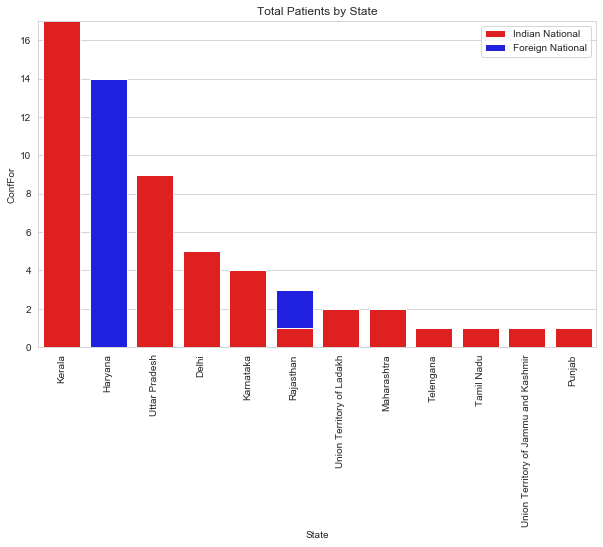

In [105]:
#Stacked Bar-Graph
plt.figure(figsize=(10,6))
plt.title("Total Patients by State")
sns.set_style(style="whitegrid")
sns.barplot(df.State, df.ConfInd, color='red', label="Indian National")
sns.barplot(df.State, df.ConfFor, color='blue', label="Foreign National",bottom=df.ConfInd)
plt.legend()
plt.xticks(rotation=90)
plt.show()

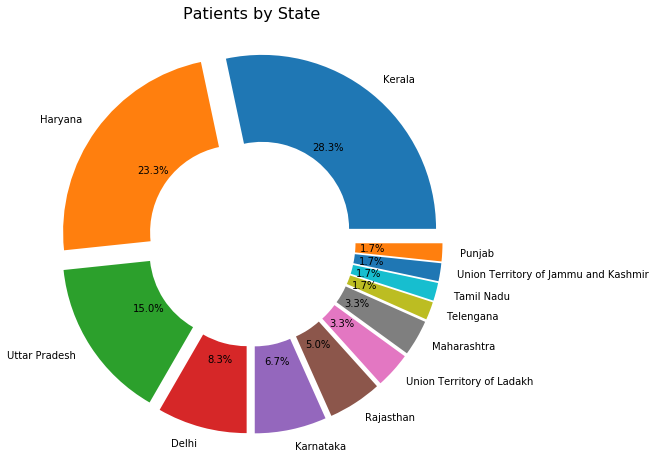

In [94]:
#Donut plot State wise Split
x=df.ConfTot
labels=df.State
explode=np.zeros(df.shape[0],)
explode=explode+0.1


plt.figure(figsize=(8,8))
plt.title("Patients by State", fontsize=16)
plt.pie(x, labels=labels, explode=explode,wedgeprops=dict(width=0.5),
        autopct='%1.1f%%', startangle=0, )
#plt.legend()
plt.show()

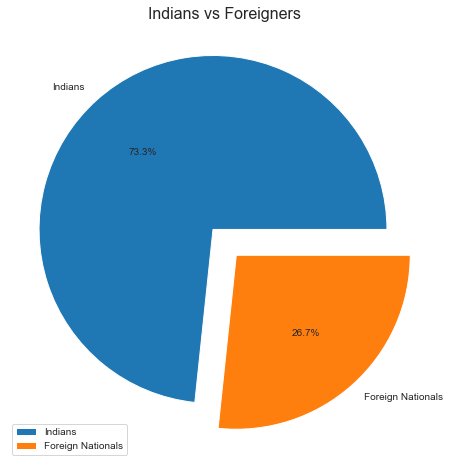

In [109]:
#Pie chart Indians Vs Foreigners
x=[i_tot,f_tot]
labels=["Indians","Foreign Nationals"]
explode=[0.1,0.1]

plt.figure(figsize=(8,8))
plt.title("Indians vs Foreigners", fontsize=16)
plt.pie(x, labels=labels, explode=explode,
        autopct='%1.1f%%')
plt.legend()
plt.show()

In [110]:
len(df.State.unique())

12

### Please upvote the notebook :)